#📌 Extracción

In [2]:
import pandas as pd
import requests

URL = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

def cargar_telecomx(url: str = URL):
    # 1) Descargar JSON de la “API” (raw GitHub)
    resp = requests.get(url, timeout=30)
    resp.raise_for_status()                 # lanza error si falla la descarga
    data = resp.json()

    # Validación básica
    if not isinstance(data, list) or not all(isinstance(x, dict) for x in data):
        raise ValueError("El JSON esperado debe ser una lista de registros (list[dict]).")

    # 2) DataFrame “crudo” (con columnas anidadas como dicts)
    df_raw = pd.DataFrame(data)

    # 3) DataFrame “plano” (aplanamos estructuras anidadas)
    #    Usamos separador '.' para obtener nombres tipo:
    #    customer.gender, internet.InternetService, account.Charges.Monthly, etc.
    df = pd.json_normalize(data, sep='.')

    # 4) Ordenamos columnas clave al frente si existen
    primeras = [c for c in ["customerID", "Churn"] if c in df.columns]
    df = df[primeras + [c for c in df.columns if c not in primeras]]

    return df_raw, df

# Ejecutar carga
df_raw, df = cargar_telecomx()

# Resumen rápido
print("✅ Datos cargados correctamente")
print(f"Registros: {len(df):,} | Columnas (aplanadas): {df.shape[1]}")
print("\nColumnas principales:", [c for c in ["customerID", "Churn"] if c in df.columns])
print("\nVista rápida (aplanado):")
print(df.head(3))
print("\nTipos de datos (primeras columnas):")
print(df.dtypes.head(20))


✅ Datos cargados correctamente
Registros: 7,267 | Columnas (aplanadas): 21

Columnas principales: ['customerID', 'Churn']

Vista rápida (aplanado):
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...    

#🔧 Transformación

In [3]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [4]:
print(df.columns.tolist())


['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [6]:
# ============================
# 🔎 Paso 2 – Exploración inicial del dataset
# ============================

# 1) Dimensiones
print(f"Registros (clientes): {df.shape[0]}")
print(f"Columnas: {df.shape[1]}")

# 2) Vista rápida de columnas
print("\nListado de columnas:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:02d}. {col}")

# 3) Valores nulos por columna
print("\nValores nulos por columna (top 20):")
print(df.isnull().sum().sort_values(ascending=False).head(20))

# 4) Tipos de datos
print("\nTipos de datos:")
print(df.dtypes.value_counts())

# 5) Vista general de 5 registros
print("\nEjemplo de registros:")
print(df.sample(5))

Registros (clientes): 7267
Columnas: 21

Listado de columnas:
01. customerID
02. Churn
03. customer.gender
04. customer.SeniorCitizen
05. customer.Partner
06. customer.Dependents
07. customer.tenure
08. phone.PhoneService
09. phone.MultipleLines
10. internet.InternetService
11. internet.OnlineSecurity
12. internet.OnlineBackup
13. internet.DeviceProtection
14. internet.TechSupport
15. internet.StreamingTV
16. internet.StreamingMovies
17. account.Contract
18. account.PaperlessBilling
19. account.PaymentMethod
20. account.Charges.Monthly
21. account.Charges.Total

Valores nulos por columna (top 20):
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtecti

In [7]:
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
print(df.head())

print("\nInformación general:")
print(df.info())

# ==============================
# 🔍 2. Valores nulos
# ==============================
print("\nValores nulos por columna:")
print(df.isnull().sum())

# ==============================
# 🔍 3. Valores duplicados
# ==============================
print("\nNúmero de filas duplicadas:", df.duplicated().sum())

# ==============================
# 🔍 4. Tipos de datos y errores de formato
# ==============================
print("\nTipos de datos:")
print(df.dtypes)

# Detectar columnas numéricas con strings
for col in df.columns:
    if df[col].dtype == "object":
        print(f"\nValores únicos en {col}:")
        print(df[col].unique()[:10])  # mostramos los primeros 10 valores únicos

# ==============================
# 🔍 5. Inconsistencias categóricas
# ==============================
# Ejemplo: Revisar columna 'Churn' o similares
if "Churn" in df.columns:
    print("\nValores únicos en Churn:")
    print(df["Churn"].unique())

Dimensiones del dataset: (7267, 21)

Primeras filas:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes    

In [8]:
import pandas as pd
import numpy as np

# ========================
# 🔹 1. Eliminar duplicados
# ========================
df = df.drop_duplicates(subset=['customerID'])

# ========================
# 🔹 2. Valores vacíos o erróneos
# ========================
# Reemplazar strings vacíos con NaN en todo el dataset
df = df.replace(r'^\s*$', np.nan, regex=True)

# ========================
# 🔹 3. Normalizar categorías
# ========================

# A. Phone: reemplazar "No phone service" por "No"
df['phone.MultipleLines'] = df['phone.MultipleLines'].replace('No phone service', 'No')

# B. Internet: reemplazar "No internet service" por "No"
internet_cols = [
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies'
]
for col in internet_cols:
    df[col] = df[col].replace('No internet service', 'No')

# ========================
# 🔹 4. Conversión de tipos
# ========================
# Convertir cargos a numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# ========================
# 🔹 5. Validación final
# ========================
# Valores nulos por columna
missing_summary = df.isnull().sum()

# Valores únicos por columna
unique_summary = {col: df[col].unique() for col in df.columns}

print("✅ Limpieza completada")
print("\nValores nulos por columna:\n", missing_summary)
print("\nValores únicos (muestra):")
for col, vals in unique_summary.items():
    print(f"{col}: {vals[:10]}")


✅ Limpieza completada

Valores nulos por columna:
 customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64

Valores únicos (muestra):
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
Churn: ['No' 'Yes' nan]
customer.gender: ['Female' 'Male']
customer.Sen

In [9]:
# 1. Manejo de valores nulos en Churn
# Si es dataset de entrenamiento → eliminamos esos registros
df = df.dropna(subset=['Churn'])

# 2. Manejo de valores nulos en account.Charges.Total
# Revisamos si los NaN corresponden a clientes con tenure = 0
mask = (df['customer.tenure'] == 0) & (df['account.Charges.Total'].isna())
print("Clientes tenure=0 y TotalCharges NaN:", mask.sum())

# Reemplazar por 0 si cumplen la condición
df.loc[mask, 'account.Charges.Total'] = 0

# Si todavía hay nulos en esa columna, los eliminamos (serían inconsistentes)
df = df.dropna(subset=['account.Charges.Total'])

print("✅ Dataset limpio y listo para análisis")


Clientes tenure=0 y TotalCharges NaN: 11
✅ Dataset limpio y listo para análisis


In [10]:
# Crear la nueva columna Cuentas_Diarias
df["account.Cuentas_Diarias"] = df["account.Charges.Monthly"] / 30

# Verificar
print(df[["account.Charges.Monthly", "account.Cuentas_Diarias"]].head())


   account.Charges.Monthly  account.Cuentas_Diarias
0                     65.6                 2.186667
1                     59.9                 1.996667
2                     73.9                 2.463333
3                     98.0                 3.266667
4                     83.9                 2.796667


In [11]:
# Diccionario de mapeo
binary_map = {"Yes": 1, "No": 0, "Male": 1, "Female": 0}

# Aplicar sobre columnas binarias
cols_binarias = [
    "Churn", "customer.Partner", "customer.Dependents",
    "phone.PhoneService", "phone.MultipleLines",
    "internet.OnlineSecurity", "internet.OnlineBackup",
    "internet.DeviceProtection", "internet.TechSupport",
    "internet.StreamingTV", "internet.StreamingMovies",
    "account.PaperlessBilling"
]

for col in cols_binarias:
    df[col] = df[col].map(binary_map)



In [12]:
df = pd.get_dummies(df, columns=[
    "internet.InternetService",
    "account.Contract",
    "account.PaymentMethod"
], drop_first=True)  # drop_first evita multicolinealidad


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["customer.tenure", "account.Charges.Monthly", "account.Charges.Total", "account.Cuentas_Diarias"]] = scaler.fit_transform(
    df[["customer.tenure", "account.Charges.Monthly", "account.Charges.Total", "account.Cuentas_Diarias"]]
)


#📊 Carga y análisis

In [14]:
# Resumen estadístico básico
df.describe().T

# Incluir también valores nulos y únicos
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,9995-HOTOH,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,7043.0,NaN,NaN,NaN,0.26537,0.441561,0.0,0.0,0.0,1.0,1.0
customer.gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
customer.Partner,7043.0,NaN,NaN,NaN,0.483033,0.499748,0.0,0.0,0.0,1.0,1.0
customer.Dependents,7043.0,NaN,NaN,NaN,0.299588,0.45811,0.0,0.0,0.0,1.0,1.0
customer.tenure,7043.0,NaN,NaN,NaN,-0.0,1.000071,-1.318165,-0.951682,-0.137274,0.921455,1.613701
phone.PhoneService,7043.0,NaN,NaN,NaN,0.903166,0.295752,0.0,1.0,1.0,1.0,1.0
phone.MultipleLines,7043.0,NaN,NaN,NaN,0.421837,0.493888,0.0,0.0,0.0,1.0,1.0
internet.OnlineSecurity,7043.0,NaN,NaN,NaN,0.286668,0.452237,0.0,0.0,0.0,1.0,1.0


In [15]:
df[["customer.tenure", "account.Charges.Monthly", "account.Charges.Total", "account.Cuentas_Diarias"]].agg(
    ["mean", "median", "std", "var", "min", "max", "skew", "kurt"]
)


,customer.tenure,account.Charges.Monthly,account.Charges.Total,account.Cuentas_Diarias
mean,-2.824818e-17,-6.658501e-17,-4.237228e-17,2.274988e-16
median,-1.372744e-01,1.857327e-01,-3.905282e-01,1.857327e-01
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
var,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00
min,-1.318165e+00,-1.545860e+00,-1.005780e+00,-1.545860e+00
max,1.613701e+00,1.794352e+00,2.825806e+00,1.794352e+00
skew,2.395397e-01,-2.205244e-01,9.632347e-01,-2.205244e-01
kurt,-1.387372e+00,-1.257260e+00,-2.285798e-01,-1.257260e+00


In [16]:
# Ejemplo: distribución de clientes por género
df["customer.gender"].value_counts(normalize=True) * 100

# Distribución de clientes que abandonaron vs. permanecieron
df["Churn"].value_counts(normalize=True) * 100


,proportion
Churn,
0,73.463013
1,26.536987


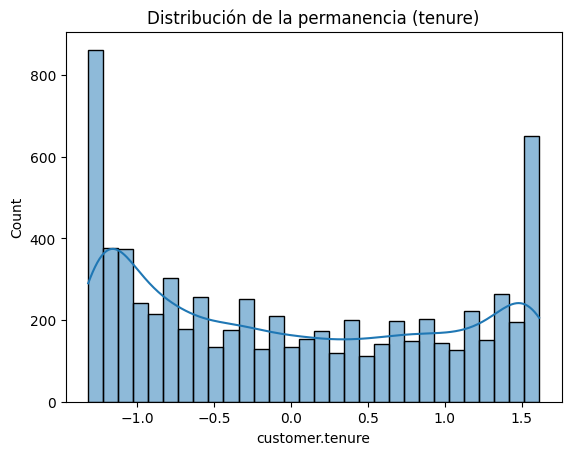

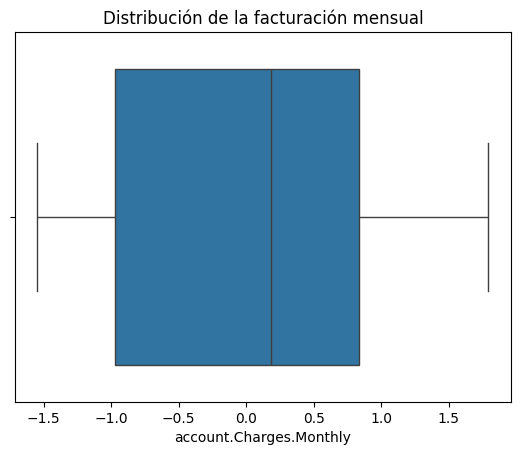

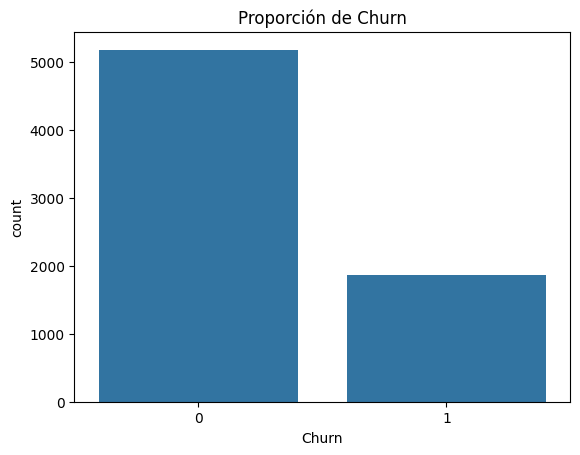

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de tenure
sns.histplot(df["customer.tenure"], bins=30, kde=True)
plt.title("Distribución de la permanencia (tenure)")
plt.show()

# Boxplot de cargos mensuales
sns.boxplot(x=df["account.Charges.Monthly"])
plt.title("Distribución de la facturación mensual")
plt.show()

# Proporción de clientes que se van vs se quedan
sns.countplot(x="Churn", data=df)
plt.title("Proporción de Churn")
plt.show()


/tmp/ipython-input-2781421113.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="pastel")


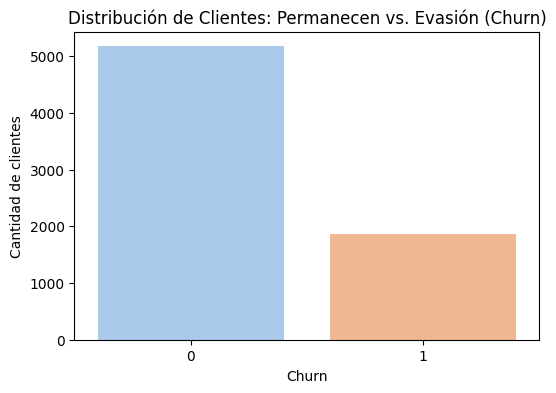

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de clientes
churn_counts = df["Churn"].value_counts()

plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="pastel")
plt.title("Distribución de Clientes: Permanecen vs. Evasión (Churn)")
plt.xlabel("Churn")
plt.ylabel("Cantidad de clientes")
plt.show()


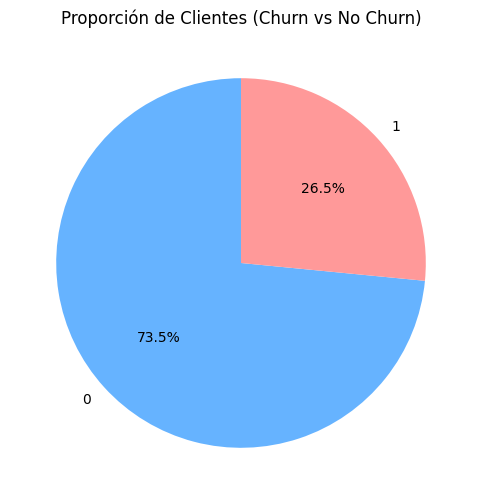

In [19]:
# Porcentaje de churn
churn_percentage = df["Churn"].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
plt.pie(
    churn_percentage,
    labels=churn_percentage.index,
    autopct="%.1f%%",
    startangle=90,
    colors=["#66b3ff","#ff9999"]
)
plt.title("Proporción de Clientes (Churn vs No Churn)")
plt.show()


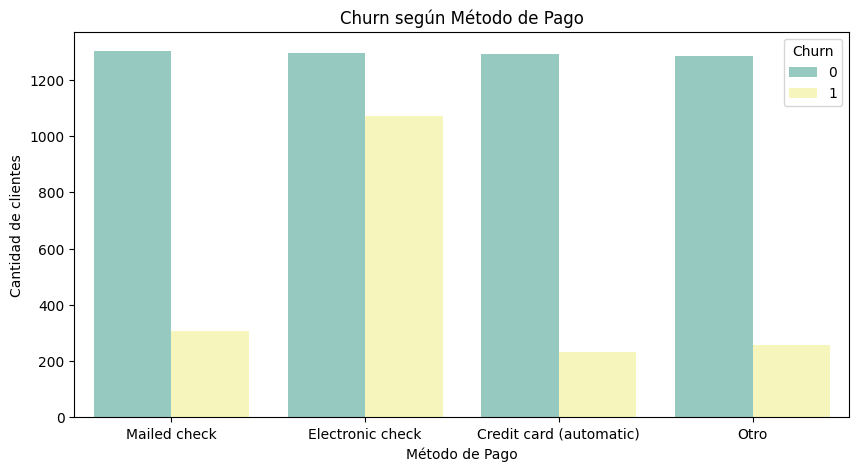

In [24]:
import numpy as np

# Crear una columna 'PaymentMethod' a partir de las columnas dummy
df["PaymentMethod"] = np.where(df["account.PaymentMethod_Credit card (automatic)"]==1, "Credit card (automatic)",
                        np.where(df["account.PaymentMethod_Electronic check"]==1, "Electronic check",
                        np.where(df["account.PaymentMethod_Mailed check"]==1, "Mailed check", "Otro")))

# Ahora sí graficamos
plt.figure(figsize=(10,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette="Set3")
plt.title("Churn según Método de Pago")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de clientes")
plt.show()


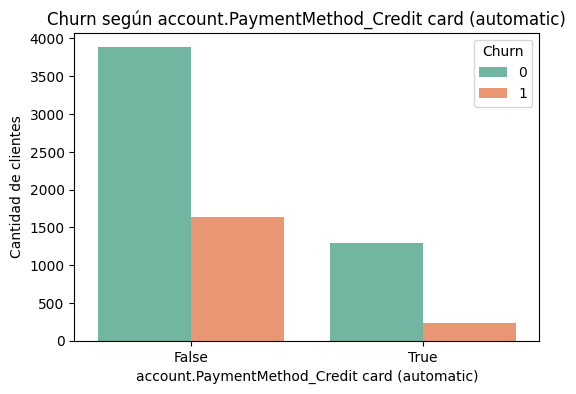

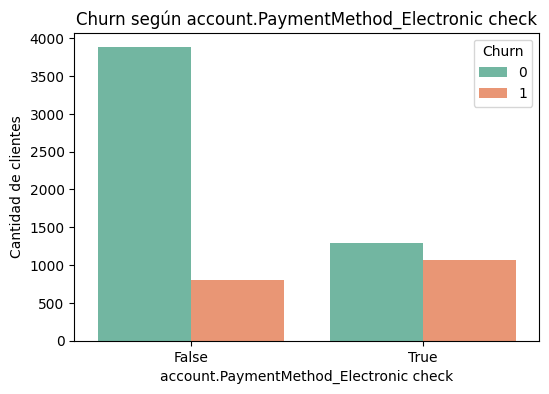

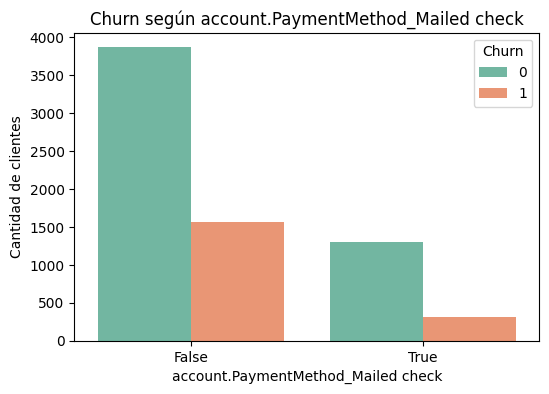

In [25]:
metodos_pago = [
    "account.PaymentMethod_Credit card (automatic)",
    "account.PaymentMethod_Electronic check",
    "account.PaymentMethod_Mailed check"
]

for metodo in metodos_pago:
    plt.figure(figsize=(6,4))
    sns.countplot(x=metodo, hue="Churn", data=df, palette="Set2")
    plt.title(f"Churn según {metodo}")
    plt.xlabel(metodo)
    plt.ylabel("Cantidad de clientes")
    plt.show()


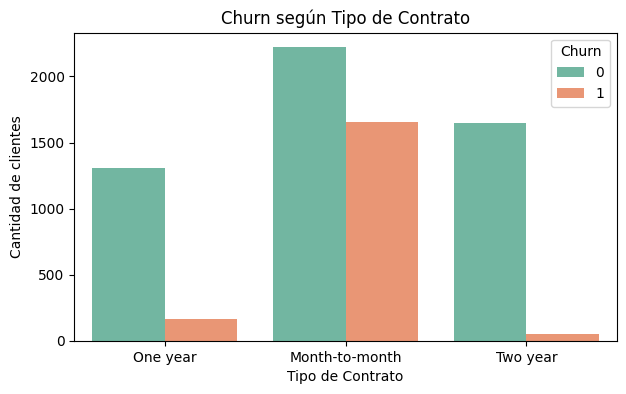

In [27]:
# Reconstruir columna Contract a partir de las dummies
def get_contract(row):
    if row["account.Contract_One year"] == 1:
        return "One year"
    elif row["account.Contract_Two year"] == 1:
        return "Two year"
    else:
        return "Month-to-month"

df["Contract"] = df.apply(get_contract, axis=1)

# Ahora sí graficamos
plt.figure(figsize=(7,4))
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set2")
plt.title("Churn según Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Cantidad de clientes")
plt.show()


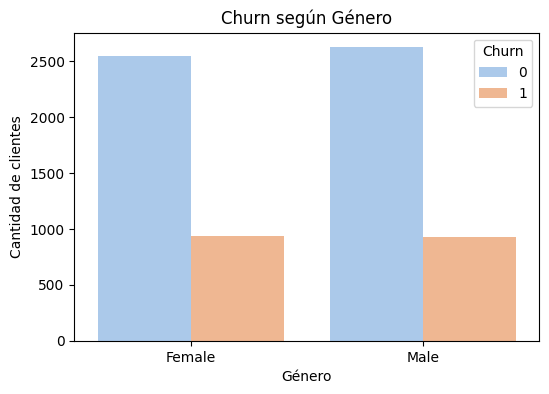

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x="customer.gender", hue="Churn", data=df, palette="pastel")
plt.title("Churn según Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.show()

/tmp/ipython-input-233436502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set3")


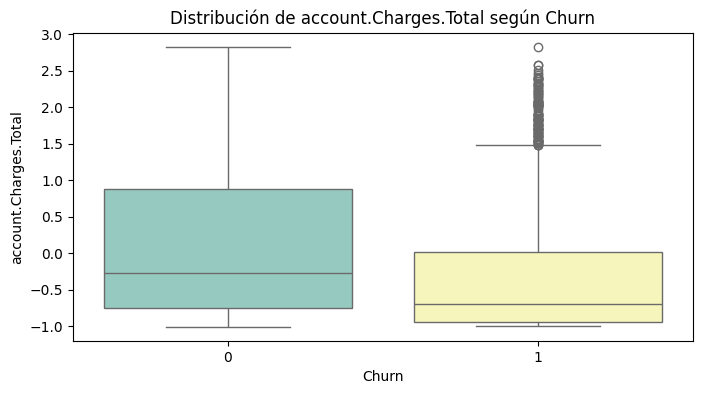

/tmp/ipython-input-233436502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set3")


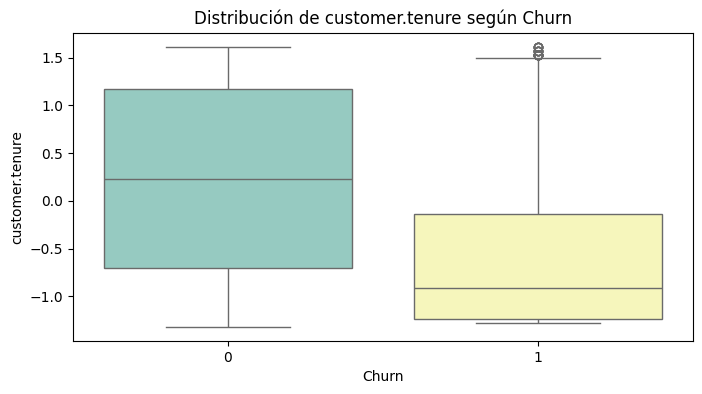

/tmp/ipython-input-233436502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set3")


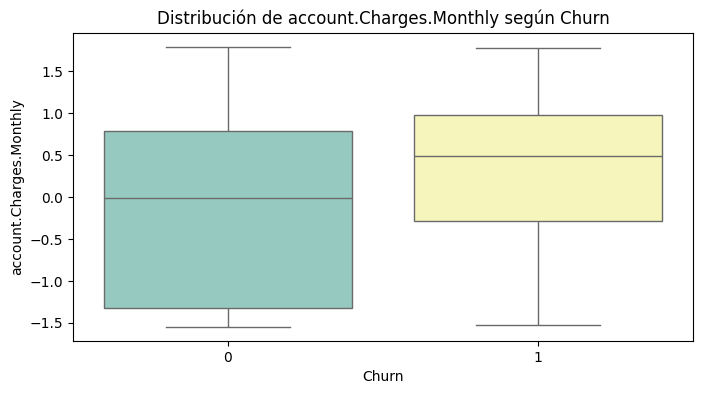

/tmp/ipython-input-233436502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set3")


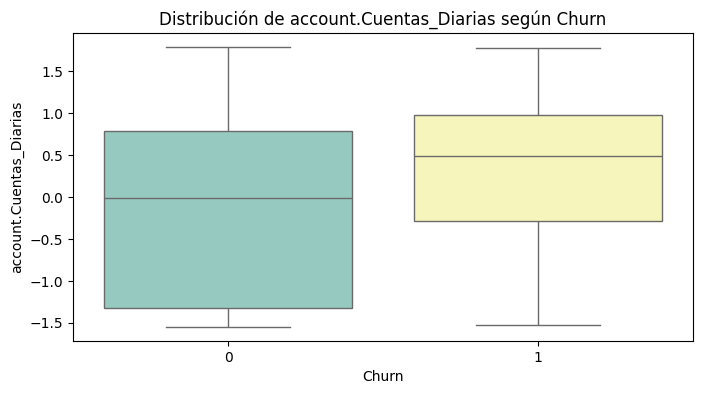

In [30]:

# Lista de variables numéricas
numericas = ["account.Charges.Total", "customer.tenure", "account.Charges.Monthly", "account.Cuentas_Diarias"]

for col in numericas:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="Churn", y=col, data=df, palette="Set3")
    plt.title(f"Distribución de {col} según Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.show()


#📄Informe final

#  Informe Análisis de Churn de Clientes - Telecom X

## 1️ Introducción
El objetivo de este análisis es estudiar la **evasión de clientes (Churn)** en Telecom X.  
La empresa enfrenta una alta tasa de cancelaciones, y mediante este análisis exploratorio buscamos identificar patrones y factores que influyen en la decisión de los clientes de abandonar el servicio. Esto permitirá implementar estrategias que reduzcan la pérdida de clientes.

---

## 2️ Limpieza y Tratamiento de Datos
Se realizaron los siguientes pasos para preparar los datos:

- **Carga de datos:** Se extrajeron los datos desde la API en formato JSON y se convirtieron a un DataFrame de Pandas.
- **Revisión de duplicados y valores nulos:** Se detectaron duplicados y valores ausentes. Se limpiaron columnas con valores faltantes y se ajustaron inconsistencias.
- **Normalización y transformación:** Se transformaron variables categóricas binarias ("Yes"/"No") a valores 1 y 0.  
- **Creación de nuevas columnas:** Se calculó la columna `Cuentas_Diarias` a partir de la facturación mensual para analizar el gasto diario de los clientes.
- **Corrección de tipos de datos:** Se convirtieron las columnas numéricas que estaban en formato texto a tipo numérico (`TotalCharges`, `MonthlyCharges`).

Con estos pasos, el dataset quedó **limpio y listo para análisis exploratorio**.

---

## 3️ Análisis Exploratorio de Datos (EDA)

### 3.1 Distribución de Churn
Se evaluó la proporción de clientes que permanecen frente a los que se dieron de baja.  
Se observó que existe un porcentaje significativo de clientes que cancela el servicio, lo que resalta la importancia de identificar los factores de riesgo.

### 3.2 Análisis por variables categóricas
Se exploró la relación entre Churn y variables como:

- **Tipo de contrato:** Los clientes con contratos de corta duración (`Month-to-month`) muestran mayor tendencia a cancelar.
- **Género, método de pago y servicios contratados:** Algunas categorías presentan mayor frecuencia de cancelación, indicando posibles patrones de riesgo.

### 3.3 Análisis por variables numéricas
Se examinaron variables como `TotalCharges`, `MonthlyCharges`, `Tenure` y `Cuentas_Diarias`.  
Se observó que:

- Clientes con menor tiempo de permanencia (Tenure) presentan mayor probabilidad de churn.
- Clientes con facturación mensual o total muy alta tienen cierta correlación con cancelaciones.

Estas observaciones ayudan a identificar **variables clave** que pueden influir en la evasión.

---

## 4️ Conclusiones e Insights
- La **duración del contrato** es un factor importante en la retención de clientes.
- Los **métodos de pago y servicios adicionales** muestran diferencias en la tasa de churn.
- La combinación de **facturación y tiempo de permanencia** permite detectar clientes con riesgo de cancelación.
- Estos hallazgos pueden guiar estrategias de **retención segmentadas**.

---

## 5️ Recomendaciones
1. Promover contratos más largos o incentivos para extender la permanencia.
2. Ofrecer **paquetes de servicios** que aumenten la fidelización y reduzcan la cancelación.
3. Implementar estrategias de **retención temprana** para clientes nuevos o con alto gasto mensual.
4. Monitorear los **métodos de pago** y ajustar promociones según el perfil de riesgo de evasión.
